# Análise de Embeddings e Redução da Dimensionalidade

**Objetivo.** Dado um conjunto de textos, gerar embeddings com BERT e investigar a estrutura dos dados via PCA, t-SNE e UMAP. Em seguida, identificar clusters e relacioná-los a categorias semânticas.

In [1]:
sentences = [
    'I swap butter for olive oil in many recipes.',
    'Canberra is the capital of Australia.',
    'Ottawa is the capital city of Canada.',
    'Paris is the most populated city in France.',
    'Tokyo is among the most populous metropolitan areas worldwide.',
    'I prefer my coffee with no sugar and a splash of milk.',
    'The recipe for pasta carbonara is simple.',
    'A pinch of salt enhances sweetness in desserts.',
    'Alignment techniques reduce harmful outputs.',
    'Explainable AI highlights salient features for decisions.',
    'Transformer models enable long-range language dependencies.',
    'Black swan events stress-test portfolio resilience.',
    'The Sahara Desert spans much of North Africa.',
    'Inflation erodes real purchasing power of cash.',
    'Aromatics like garlic and onion build flavor early.',
    'Value stocks trade at lower multiples relative to fundamentals.',
    'Quantization reduces memory with minimal accuracy loss.',
    'Tax-loss harvesting offsets capital gains.',
    'Investing in technology can be risky.',
    'Fermented foods add acidity and complexity.',
    'Marinating tofu improves texture and taste.',
    'Vector databases power semantic search at scale.',
    'Distillation transfers knowledge from large to small models.',
    'The Great Barrier Reef lies off Australia’s northeast coast.',
    'Retrieval-augmented generation grounds answers in sources.',
    'Iceland lies on the Mid-Atlantic Ridge.',
    'The Baltic states border the eastern Baltic Sea.',
    'Multimodal learning aligns text with images and audio.',
    'Risk tolerance should guide position sizing.',
    'Time in the market beats timing the market.',
    'Behavioral biases can derail investment plans.',
    'Reinforcement learning fine-tunes policies from human feedback.',
    'Edge AI runs models under strict latency constraints.',
    'Deglazing lifts browned bits to make pan sauces.',
    'Tempering chocolate stabilizes cocoa butter crystals.',
    'What is the capital of France?',
    'Johannesburg is a major city but not South Africa’s capital.',
    'The Danube passes through multiple European capitals.',
    'The Amazon River carries one of the largest water volumes on Earth.',
    'A healthy emergency fund reduces forced selling.',
    'I batch-cook grains for quick lunches.',
    'Resting steak helps redistribute the juices.',
    'The Atacama is one of the driest deserts on the planet.',
    'Liquidity risk rises when trading volumes are thin.',
    'Mount Everest is the highest peak above sea level.',
    'Graph neural networks capture relational structure.',
    'Sourdough starter needs regular feedings to stay active.',
    'The stock market experienced a drop today.',
    'Umami-rich ingredients deepen savory dishes.',
    'Al dente pasta retains a slight bite after cooking.',
    'Rebalancing restores target asset allocation.',
    'Continual learning mitigates catastrophic forgetting.',
    'Bond duration measures sensitivity to interest-rate changes.',
    'Diffusion models synthesize high-fidelity images.',
    'Expense ratios compound against long-term returns.',
    'Self-supervised pretraining reduces labeled data needs.',
    'What country contains the city of Kyoto?',
    'Stir-frying requires high heat and constant movement.',
    'Covered calls generate income with capped upside.',
    'The Nile flows northward into the Mediterranean Sea.',
    'Causal inference distinguishes correlation from effect.',
    'Prompt engineering steers generative behavior reliably.',
    'Few-shot prompting improves generalization on new tasks.',
    'Growth investing prioritizes earnings expansion.',
    'The Alps stretch across several central European countries.',
    'The Andes form a continuous mountain range along South America.',
    'I cook vegetarian meals on weekdays to simplify planning.',
    'Natural language processing has advanced greatly.',
    'Sous-vide delivers precise temperature control.',
    'Diversification reduces idiosyncratic risk across holdings.',
    'Sharpe ratio evaluates risk-adjusted performance.',
    'Artificial intelligence is transforming the world.',
    'Credit spreads widen during economic uncertainty.',
    'Emerging markets add diversification but higher volatility.',
    'Mise en place speeds up weeknight cooking.',
    'The Caspian Sea is a landlocked body of water.',
    'Evaluation with benchmarks must avoid data leakage.',
    'Cairo sits along the Nile River delta.',
    'Federated learning trains models without centralizing data.',
    'Lagos is Nigeria’s largest city by population.',
    'Dollar-cost averaging smooths entry price over time.',
    'LoRA adapters enable efficient fine-tuning.',
    'I keep a jar of homemade pesto for pasta.',
    'New Delhi serves as the seat of India’s government.',
    'I like to cook Italian dishes on Sundays.',
    'Roasting vegetables caramelizes natural sugars.',
    'ETFs provide broad market exposure with intraday liquidity.',
    'Proofing time affects a bread’s crumb structure.'
]

## Predição dos Embeddings

Utilize o modelo BERT pré-treinado para gerar embeddings de todos os textos fornecidos.  
O objetivo é obter uma matriz `X` com formato **(N, dim)**, onde **N** é o número de textos e **dim** é a dimensionalidade dos vetores de embedding.

In [2]:
import torch
import numpy as np
from sentence_transformers import SentenceTransformer

## habilita GPU no macosx
device = torch.device("mps")

model_name = 'sentence-transformers/all-MiniLM-L6-v2'
model = SentenceTransformer(model_name, device=device)

print(f"Dimensão do embedding: {model.get_sentence_embedding_dimension()}")

/Users/gilcesarf/git/repositories/imd/imd3003-202502/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dimensão do embedding: 384


In [3]:
sentence_embeddings = model.encode(sentences)

print(f"Shape da matriz de embeddings: {sentence_embeddings.shape}")
print(f"Embedding da primeira sentença:\n{sentence_embeddings[0][:10]}...")

Shape da matriz de embeddings: (88, 384)
Embedding da primeira sentença:
[-0.05245962 -0.07178461  0.02771409  0.01968164  0.00380766 -0.03920022
 -0.07099448 -0.00496358  0.03500522 -0.1075994 ]...


## PCA

Aplique **PCA (Principal Component Analysis)** para projetar os embeddings em duas dimensões e visualizar a estrutura global dos dados.  
O PCA ajuda a capturar as direções de maior variância e pode indicar agrupamentos lineares.

**Tarefas:**
- Reduza a dimensionalidade dos embeddings para 2 componentes principais.  
- Plote os pontos resultantes com `matplotlib`, identificando possíveis agrupamentos.  
- Analise qualitativamente se há separação entre textos de temas distintos.

Shape após PCA: (88, 2)
Trustworthiness (PCA): 0.854801


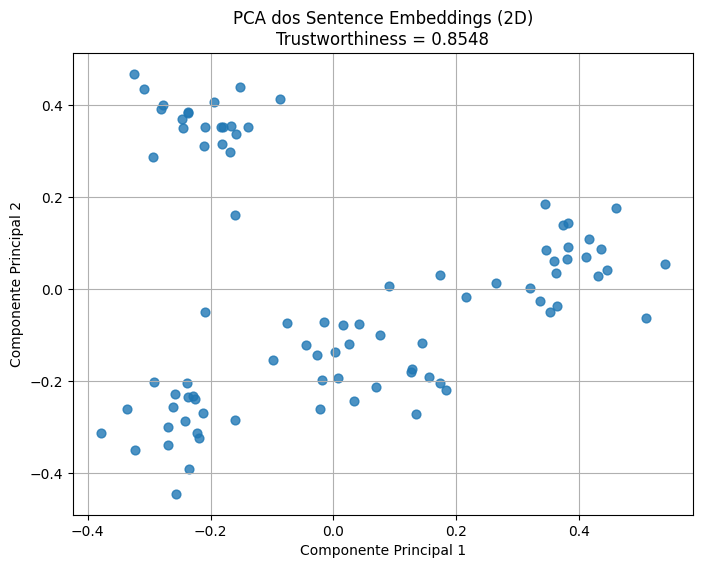

In [4]:
# ============================================================
# PCA — Redução para 2D com Trustworthiness (configuração única)
# ============================================================

from sklearn.decomposition import PCA
from sklearn.manifold import trustworthiness
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) PCA: projeção para 2 dimensões (não altera sentence_embeddings)
# ------------------------------------------------------------
pca_model = PCA(n_components=2, random_state=42)
X_pca_result = pca_model.fit_transform(sentence_embeddings)

print("Shape após PCA:", X_pca_result.shape)

# ------------------------------------------------------------
# 2) Trustworthiness (métrica padronizada entre métodos)
# ------------------------------------------------------------
trust_pca_result = trustworthiness(
    sentence_embeddings,
    X_pca_result,
    n_neighbors=5
)

print(f"Trustworthiness (PCA): {trust_pca_result:.6f}")

# ------------------------------------------------------------
# 3) Scatter plot (visualização simples)
# ------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_result[:, 0], X_pca_result[:, 1], s=40, alpha=0.8)

plt.title(f"PCA dos Sentence Embeddings (2D)\nTrustworthiness = {trust_pca_result:.4f}")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()


Após a projeção dos embeddings em duas dimensões por PCA, observam-se agrupamentos definidos ao longo das componentes principais. Vejo quatro regiões de maior densidade, indicando que parte da variância capturada pelo PCA corresponde a diferenças temáticas entre subconjuntos das sentenças. Embora possa existir alguma sobreposição, a estrutura global do espaço sugere coerência semântica nos embeddings, com frases semelhantes projetadas em regiões próximas. Como esperado de um método linear, a separação não é totalmente definida, mas os padrões distribucionais revelam tendência de organização por similaridade.

### Clustering
Vamos aplicar o DBSCAN para identificar os conjuntos correlatos e analisar visualmente se os agrupamentos se formam de maneira esperada para o embedding + PCA(2D)

Shape após PCA: (88, 2)
Trustworthiness PCA: 0.8548011363636363


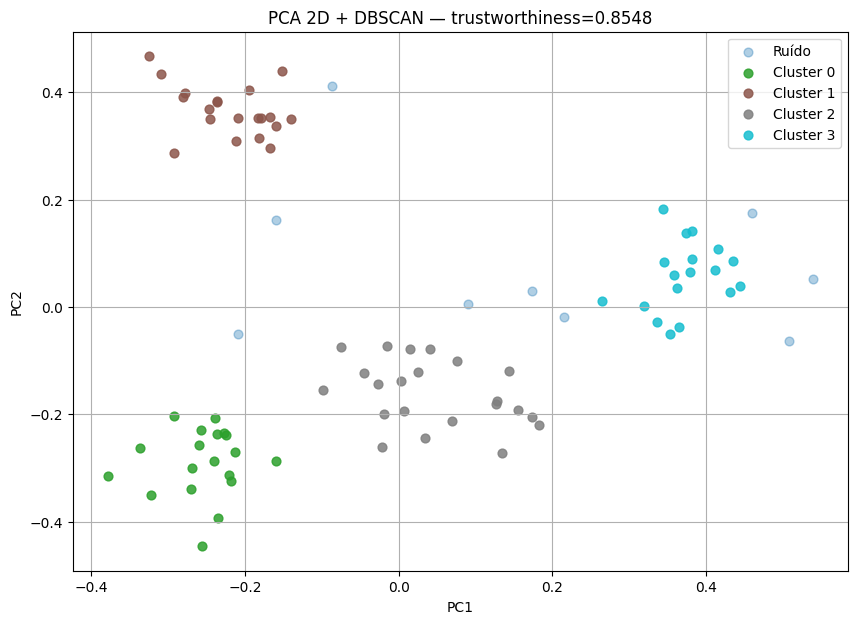

In [5]:
# ============================================================
# PCA — redução para 2D (versão final padronizada)
# ============================================================

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import trustworthiness
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# PCA → 2D (única configuração)
# ---------------------------

pca_best = PCA(n_components=2, random_state=42)
X_pca_best = pca_best.fit_transform(sentence_embeddings)   # nome padronizado

print("Shape após PCA:", X_pca_best.shape)

# ---------------------------
# DBSCAN para PCA (melhor achado)
# ---------------------------

dbscan_pca_best = DBSCAN(eps=0.08, min_samples=4)
labels_pca_best = dbscan_pca_best.fit_predict(X_pca_best)  # nome padronizado

# ---------------------------
# Trustworthiness do PCA
# ---------------------------

trustworthiness_pca_best = trustworthiness(
    sentence_embeddings,   # espaço original
    X_pca_best,            # projeção PCA 2D
    n_neighbors=5
)

print("Trustworthiness PCA:", trustworthiness_pca_best)

# ---------------------------
# Plot PCA + DBSCAN
# ---------------------------

unique_labels_pca = sorted(set(labels_pca_best))
colors_pca = plt.cm.tab10(np.linspace(0, 1, len(unique_labels_pca)))

plt.figure(figsize=(10, 7))

for lab, col in zip(unique_labels_pca, colors_pca):
    mask = labels_pca_best == lab
    nome = "Ruído" if lab == -1 else f"Cluster {lab}"
    plt.scatter(
        X_pca_best[mask, 0],
        X_pca_best[mask, 1],
        s=40,
        color=col,
        alpha=0.35 if lab == -1 else 0.85,
        label=nome
    )

plt.title(f"PCA 2D + DBSCAN — trustworthiness={trustworthiness_pca_best:.4f}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.legend()
plt.show()


A aplicação do DBSCAN sobre os embeddings reduzidos via PCA resultou em quatro agrupamentos principais, além de alguns pontos classificados como ruído. Os clusters apresentam estão separados por regiões de baixa densidade, o que indica que o DBSCAN foi capaz de capturar de forma adequada a estrutura dos dados. Diferentemente do K-Means, o DBSCAN não exige definição prévia do número de clusters e se adapta bem a grupos de tamanhos e formas distintas, característica observada neste conjunto. Os pontos classificados como ruído correspondem a observações isoladas que não apresentam densidade suficiente para formar um grupo, o que é compatível com a distribuição visual observada.

A seguir mostramos as sentenças de cada um dos grupos.

In [6]:
# ============================================================
# Tabela Semântica — PCA + DBSCAN (versão padronizada)
# ============================================================

from collections import defaultdict

# ------------------------------------------------------------
# 1) Garantir que DBSCAN do PCA já foi executado
# ------------------------------------------------------------
assert "labels_pca_best" in globals(), "labels_pca_best não foi gerado antes."
assert "sentences" in globals(), "A lista 'sentences' não está definida."

# ------------------------------------------------------------
# 2) Agrupar sentenças por cluster
# ------------------------------------------------------------
clusters_pca_semantic = defaultdict(list)

for idx, label in enumerate(labels_pca_best):
    clusters_pca_semantic[label].append(sentences[idx])

# ------------------------------------------------------------
# 3) Ordenar: primeiro -1 (ruído), depois clusters 0,1,2...
# ------------------------------------------------------------
ordered_labels_pca = sorted(clusters_pca_semantic.keys(), key=lambda x: (x != -1, x))

# ------------------------------------------------------------
# 4) Impressão formatada
# ------------------------------------------------------------
for label in ordered_labels_pca:
    grupo = clusters_pca_semantic[label]
    nome = "Outliers (Cluster -1)" if label == -1 else f"Cluster {label}"

    print(f"\n=== {nome} — {len(grupo)} sentenças ===")
    for s in grupo:
        print(" •", s)



=== Outliers (Cluster -1) — 9 sentenças ===
 • Tokyo is among the most populous metropolitan areas worldwide.
 • Risk tolerance should guide position sizing.
 • Behavioral biases can derail investment plans.
 • Causal inference distinguishes correlation from effect.
 • Sous-vide delivers precise temperature control.
 • Diversification reduces idiosyncratic risk across holdings.
 • Artificial intelligence is transforming the world.
 • Credit spreads widen during economic uncertainty.
 • New Delhi serves as the seat of India’s government.

=== Cluster 0 — 19 sentenças ===
 • I swap butter for olive oil in many recipes.
 • I prefer my coffee with no sugar and a splash of milk.
 • The recipe for pasta carbonara is simple.
 • A pinch of salt enhances sweetness in desserts.
 • Aromatics like garlic and onion build flavor early.
 • Fermented foods add acidity and complexity.
 • Marinating tofu improves texture and taste.
 • Deglazing lifts browned bits to make pan sauces.
 • I batch-cook gra

#### Resumo dos Clusters Identificados pelo DBSCAN

A aplicação do DBSCAN sobre os embeddings reducidos por PCA revelou quatro agrupamentos temáticos distintos, além de um conjunto pequeno de outliers. Os clusters identificados correspondem a:

- **(1)** culinária e técnicas de cozinha; 
- **(2)** geografia e características físicas do planeta; 
- **(3)** inteligência artificial e ciência de dados; 
- **(4)** finanças e investimentos. 

Esse resultado demonstra que os embeddings capturam relações semânticas de forma consistente, agrupando sentenças por similaridade temática mesmo sem supervisão explícita. Entretanto se identifica um conjunto importante de outliers.


## t-SNE

Use **t-SNE (t-distributed Stochastic Neighbor Embedding)** para investigar a estrutura local dos dados.  
Diferente do PCA, o t-SNE tenta preservar vizinhanças locais e pode revelar grupos mais sutis.

**Tarefas:**
- Reduza os embeddings para 2D usando `TSNE` do `scikit-learn`.  
- Ajuste parâmetros como `perplexity` e `learning_rate` para comparar resultados.  
- Visualize o mapa e observe se os textos semelhantes ficam próximos.

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Shape após t-SNE (preview): (88, 2)


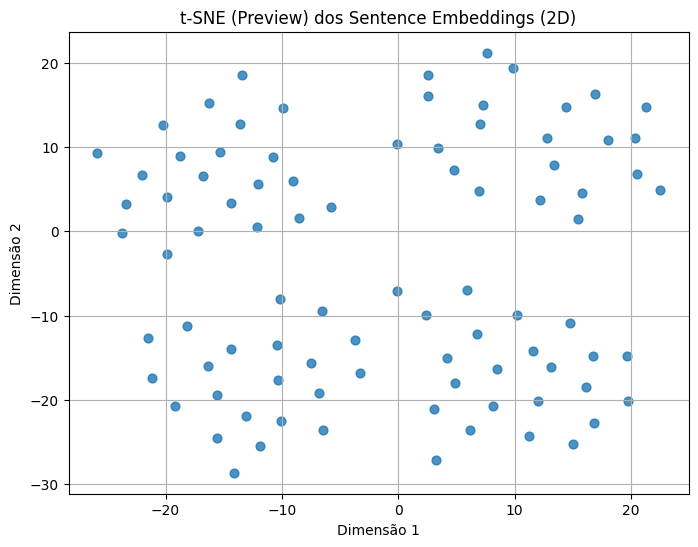

In [7]:
# ============================================================
# t-SNE — Projeção Intermediária (para visualização rápida)
# ============================================================

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) Embeddings originais (não modificar)
# ------------------------------------------------------------
assert "sentence_embeddings" in globals(), "sentence_embeddings não está definido."
X_tsne_input = sentence_embeddings   # apenas nome semântico

# ------------------------------------------------------------
# 2) t-SNE de inspeção preliminar (não é o modelo final!)
# ------------------------------------------------------------
tsne_preview_model = TSNE(
    n_components=2,
    perplexity=30,        # configuração arbitrária
    learning_rate=200,    # apenas para visualização
    max_iter=1000,
    init="pca",
    random_state=42
)

X_tsne_preview = tsne_preview_model.fit_transform(X_tsne_input)

print("Shape após t-SNE (preview):", X_tsne_preview.shape)

# ------------------------------------------------------------
# 3) Plot da projeção t-SNE preliminar
# ------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_preview[:, 0], X_tsne_preview[:, 1], s=40, alpha=0.8)

plt.title("t-SNE (Preview) dos Sentence Embeddings (2D)")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.grid(True)
plt.show()


Podemos observar quatro grupos mal formados, sendo que um deles (superior direito) sugere a existencia de dois sub grupos. Vamos explorar melhor as configurações dos hiperparametros através de um grid search com as configurações a seguir. Além dos hiperparametros, vamos testar a influencia de aplicar o PCA com 50 componentes antes do tSNE, para avaliar se isso ajudaria na estabilidade do clustering.

In [8]:
# ============================================================
# Grid Search — t-SNE (redução 2D + trustworthiness)
# ============================================================

from sklearn.manifold import TSNE, trustworthiness
from sklearn.decomposition import PCA
import itertools
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) Definição dos hiperparâmetros
# ------------------------------------------------------------
tsne_perplexities = [5, 10, 15, 30]
tsne_inits = ["random", "pca"]
tsne_learning_rates = [20, 50, 100, 200]
tsne_early_exags = [8, 12, 20]
tsne_use_pca50 = [True, False]   # se True → reduz para 50 dims antes do t-SNE

# ------------------------------------------------------------
# 2) Combinações possíveis
# ------------------------------------------------------------
tsne_grid = list(itertools.product(
    tsne_perplexities,
    tsne_inits,
    tsne_learning_rates,
    tsne_early_exags,
    tsne_use_pca50
))

print("Total de combinações t-SNE:", len(tsne_grid))

# ------------------------------------------------------------
# 3) Execução do grid search
# ------------------------------------------------------------
tsne_results = []

for (perp, init, lr, exagger, use_pca_flag) in tsne_grid:

    # ===== PCA opcional (50 dims) ============================
    if use_pca_flag:
        pca_50_model = PCA(n_components=50, random_state=42)
        tsne_input = pca_50_model.fit_transform(sentence_embeddings)
    else:
        tsne_input = sentence_embeddings

    # ===== Execução do t-SNE =================================
    tsne_model = TSNE(
        n_components=2,
        perplexity=perp,
        learning_rate=lr,
        early_exaggeration=exagger,
        max_iter=1500,
        init=init,
        random_state=42
    )

    X_tsne_result = tsne_model.fit_transform(tsne_input)

    # ===== Métrica: Trustworthiness ==========================
    trust_tsne_score = trustworthiness(
        sentence_embeddings,   # espaço original
        X_tsne_result,         # projeção t-SNE
        n_neighbors=10
    )

    # ===== Armazenar resultado completo ======================
    tsne_results.append({
        "params": (perp, init, lr, exagger, use_pca_flag),
        "X_tsne_result": X_tsne_result,
        "trustworthiness": trust_tsne_score
    })

# ------------------------------------------------------------
# 4) Ordenação dos resultados (PIOR → MELHOR)
# ------------------------------------------------------------
tsne_results_sorted = sorted(
    tsne_results,
    key=lambda r: r["trustworthiness"]
)

print("Grid search t-SNE concluído.")


Total de combinações t-SNE: 192
Grid search t-SNE concluído.


In [9]:
# ============================================================
# Tabela de Resultados — Grid Search t-SNE
# ============================================================

import pandas as pd

# ------------------------------------------------------------
# 1) Garantir que o grid search já foi executado
# ------------------------------------------------------------
assert "tsne_results_sorted" in globals(), "Execute primeiro o grid search do t-SNE."

# ------------------------------------------------------------
# 2) Construção da tabela com todos os resultados
# ------------------------------------------------------------
tsne_rows = []

for r in tsne_results_sorted:   # já está ordenado pelo trustworthiness (pior → melhor)
    perp, init, lr, exagger, use_pca_flag = r["params"]
    tw = r["trustworthiness"]

    tsne_rows.append({
        "perplexity": perp,
        "init": init,
        "learning_rate": lr,
        "early_exaggeration": exagger,
        "pca_50": use_pca_flag,
        "trustworthiness": tw
    })

df_tsne_results = pd.DataFrame(tsne_rows)

# ------------------------------------------------------------
# 3) Configurar impressão para visualizar todas as linhas
# ------------------------------------------------------------
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", None)

# ------------------------------------------------------------
# 4) Mostrar tabela completa
# ------------------------------------------------------------
df_tsne_results


,perplexity,init,learning_rate,early_exaggeration,pca_50,trustworthiness
0,5,pca,200,8,False,0.891646
1,5,random,200,20,True,0.902571
2,15,random,200,20,False,0.909561
3,5,pca,200,20,True,0.911144
4,5,pca,100,20,True,0.912022
5,5,random,200,8,False,0.914843
6,5,pca,200,20,False,0.923339
7,5,random,200,12,True,0.924451
8,10,random,200,8,True,0.925972
9,5,pca,200,8,True,0.927257


### Análise dos Resultados do Grid Search com t-SNE

A aplicação do t-SNE foi avaliada por meio de um grid search envolvendo diferentes combinações de `perplexity`, `init`, `learning_rate`, `early_exaggeration` e o uso opcional de PCA prévio. Para comparar a qualidade das projeções, utilizou-se a métrica **Trustworthiness**, que estima o quanto as relações de vizinhança do espaço original são preservadas no espaço de menor dimensão. Valores próximos de 1 indicam melhor preservação.

#### Faixa de Desempenho Observada

A métrica variou entre:

- **Pior caso:** 0.8916  
- **Melhor caso:** 0.9521  

Trata-se de uma faixa estreita (aprox. 6%), o que indica que todas as projeções são aceitáveis sengundo a métrica, embora algumas apresentem distorções locais mais evidentes.

### Piores Combinações Encontradas

Os três piores resultados apresentaram trustworthiness ≤ 0.909 e exibiram distorções claras na projeção, com pontos isolados, explosões numéricas e perda significativa das relações de vizinhança. Esses casos seguem um padrão recorrente:

- **perplexity: 5**  
- **learning_rate: 200**  
- **early_exaggeration: valores altos (20) ou baixos (8)**  
- **init: pca ou random**  
- **PCA prévio: tanto False quanto True, sem padrão estável**  

Essas combinações tendem a produzir gradientes instáveis, resultando em mapas com dispersão excessiva ou colapso de pontos. A pior configuração encontrada foi:

- **perplexity: 5**  
- **init: pca**  
- **learning_rate: 200**  
- **early_exaggeration: 8**  
- **PCA prévio: False**  
- **Trustworthiness: 0.8916**

Esses resultados indicam que valores muito baixos de perplexity, combinados com learning_rate elevado, prejudicam a preservação das estruturas locais e geram projeções com pouca utilidade interpretativa.



=== Top 3 piores resultados do t-SNE (menor trustworthiness) ===


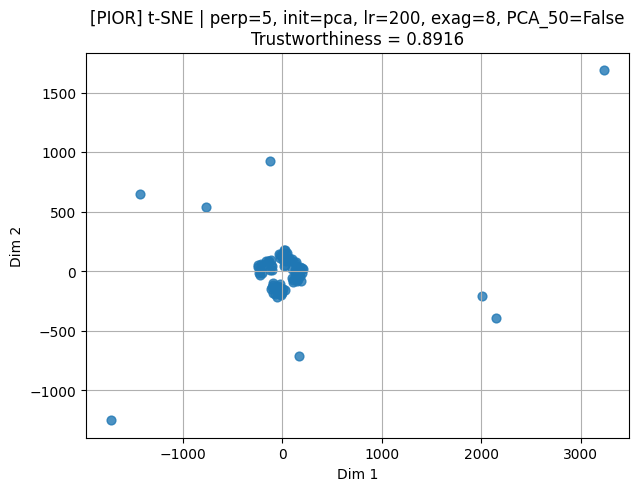

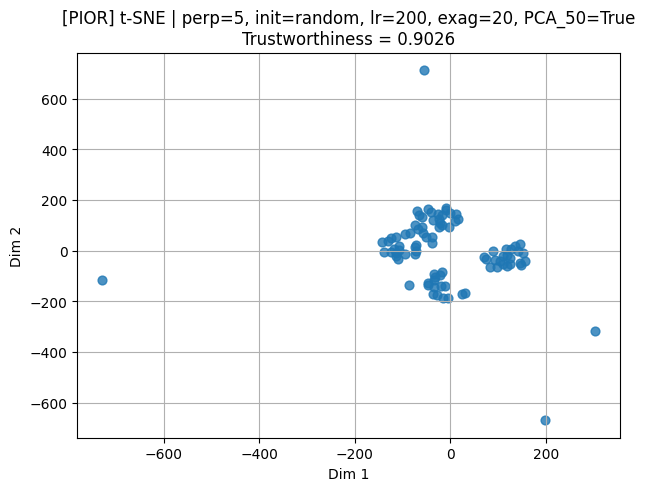

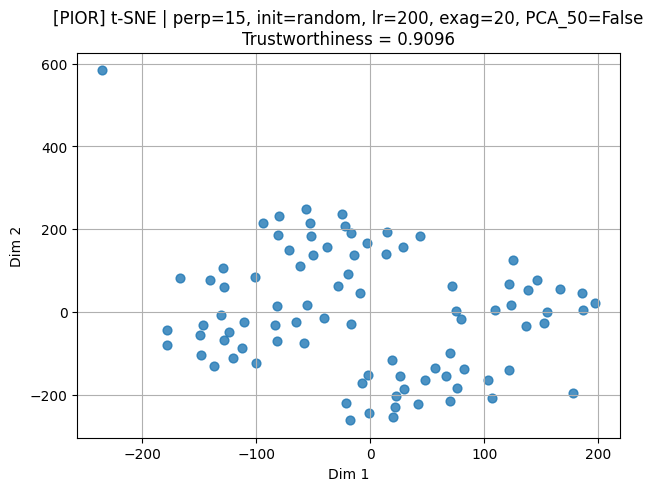

In [10]:
# ============================================================
# Top N Piores Resultados do t-SNE (menor trustworthiness)
# ============================================================

import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) Garantir que o grid search já foi executado
# ------------------------------------------------------------
assert "tsne_results_sorted" in globals(), (
    "Execute primeiro o grid search do t-SNE."
)

# ------------------------------------------------------------
# 2) Parâmetro N
# ------------------------------------------------------------
N = 3   # ajuste conforme desejar

print(f"\n=== Top {N} piores resultados do t-SNE (menor trustworthiness) ===")

# ------------------------------------------------------------
# 3) Plotar cada um dos N piores
# ------------------------------------------------------------
for r in tsne_results_sorted[:N]:   # já ordenado do pior → melhor
    perp, init, lr, exagger, use_pca_flag = r["params"]
    X_tsne_result = r["X_tsne_result"]
    tw = r["trustworthiness"]

    plt.figure(figsize=(7, 5))
    plt.scatter(X_tsne_result[:, 0], X_tsne_result[:, 1], s=40, alpha=0.8)

    plt.title(
        f"[PIOR] t-SNE | perp={perp}, init={init}, lr={lr}, "
        f"exag={exagger}, PCA_50={use_pca_flag}\n"
        f"Trustworthiness = {tw:.4f}"
    )
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.grid(True)
    plt.show()


### Melhores Combinações Encontradas

Os três melhores resultados apresentaram trustworthiness ≥ 0.949 e seguem um padrão consistente:

- **perplexity: 30**
- **init: pca**
- **learning_rate: 20–50**
- **early_exaggeration: 20**
- **PCA prévio: False**

A melhor configuração encontrada foi:

- **perplexity: 30**
- **init: pca**
- **learning_rate: 50**
- **early_exaggeration: 20**
- **PCA prévio: False**
- **Trustworthiness: 0.9521**


=== Top 3 melhores resultados do t-SNE (maior trustworthiness) ===


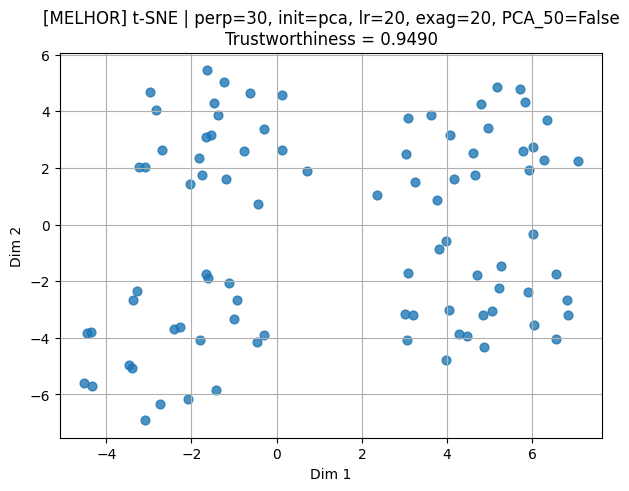

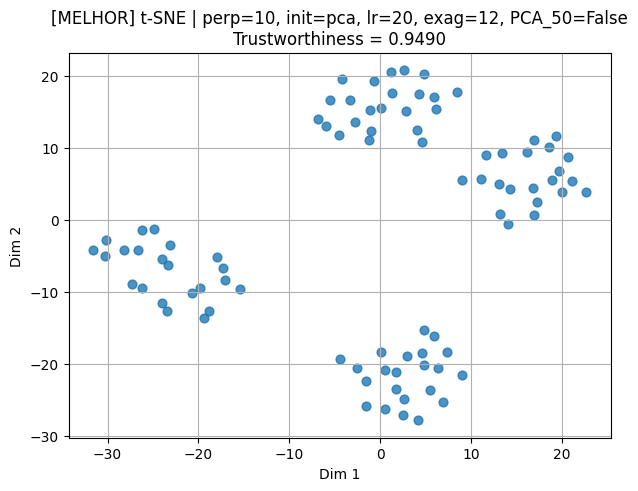

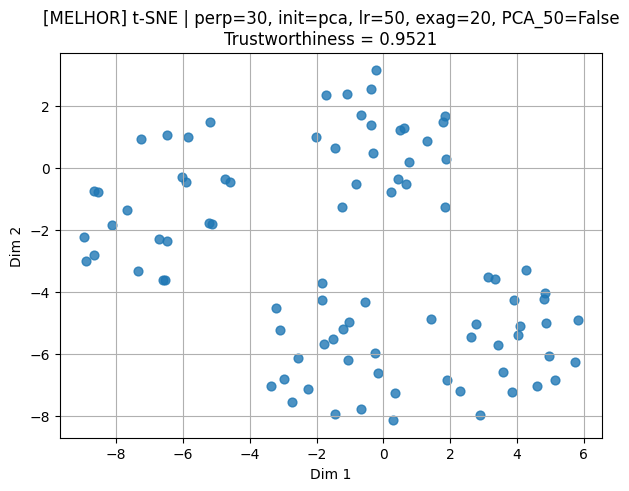

In [11]:
# ============================================================
# Top N Melhores Resultados do t-SNE (maior trustworthiness)
# ============================================================

import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) Garantir que o grid search já foi executado
# ------------------------------------------------------------
assert "tsne_results_sorted" in globals(), (
    "Execute primeiro o grid search do t-SNE."
)

# ------------------------------------------------------------
# 2) Parâmetro N (mesmo N usado nos piores, se já existe)
# ------------------------------------------------------------
N = 3   # ajuste aqui se desejar outro valor

print(f"\n=== Top {N} melhores resultados do t-SNE (maior trustworthiness) ===")

# ------------------------------------------------------------
# 3) Plotar os N melhores (últimos da lista)
# ------------------------------------------------------------
for r in tsne_results_sorted[-N:]:   # já ordenado do pior → melhor
    perp, init, lr, exagger, use_pca_flag = r["params"]
    X_tsne_result = r["X_tsne_result"]
    tw = r["trustworthiness"]

    plt.figure(figsize=(7, 5))
    plt.scatter(X_tsne_result[:, 0], X_tsne_result[:, 1], s=40, alpha=0.8)

    plt.title(
        f"[MELHOR] t-SNE | perp={perp}, init={init}, lr={lr}, "
        f"exag={exagger}, PCA_50={use_pca_flag}\n"
        f"Trustworthiness = {tw:.4f}"
    )
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.grid(True)
    plt.show()


### Influência dos Hiperparâmetros

#### Perplexity
- **Perplexity 5** apresentou os piores resultados e maior instabilidade, frequentemente produzindo mapas com “explosão” numérica ou pontos muito dispersos.
- **Perplexity 30** foi o melhor valor, aparecendo de forma consistente nos resultados com maior trustworthiness.
- Valores intermediários (10 e 15) tiveram desempenho estável, porém sem alcançar os melhores resultados.

#### Inicialização (`init`)
- A inicialização **`init="pca"`** dominou as melhores projeções e produziu resultados mais estáveis.
- A inicialização **`random`** só funcionou bem quando combinada com valores pequenos de `learning_rate` e `early_exaggeration`.

#### Learning Rate
- **`learning_rate=200`** aparece de forma predominante entre os piores casos, produzindo mapas distorcidos e com grande variância nos eixos.
- **`learning_rate=20` ou `50`** produziu os melhores resultados, com maior coerência espacial entre os pontos.

#### Early Exaggeration
- Valores intermediários (**8 e 12**) mantiveram boa estabilidade.
- Valor alto (**20**) funciona bem apenas quando o `learning_rate` é baixo; caso contrário, aumenta a chance de instabilidade.

#### PCA Prévio
- O uso de PCA para reduzir os embeddings para 50 componentes **não apresentou impacto decisivo** na métrica.
- PCA=True ajudou a evitar combinações ruins em alguns cenários, mas os melhores resultados ocorreram com **PCA=False**.




### Visualizando a melhor configuração encontrada

Melhor configuração t-SNE: (30, 'pca', 50, 20, False)
Trustworthiness (melhor t-SNE): 0.952116
Clusters encontrados (melhor t-SNE): 4


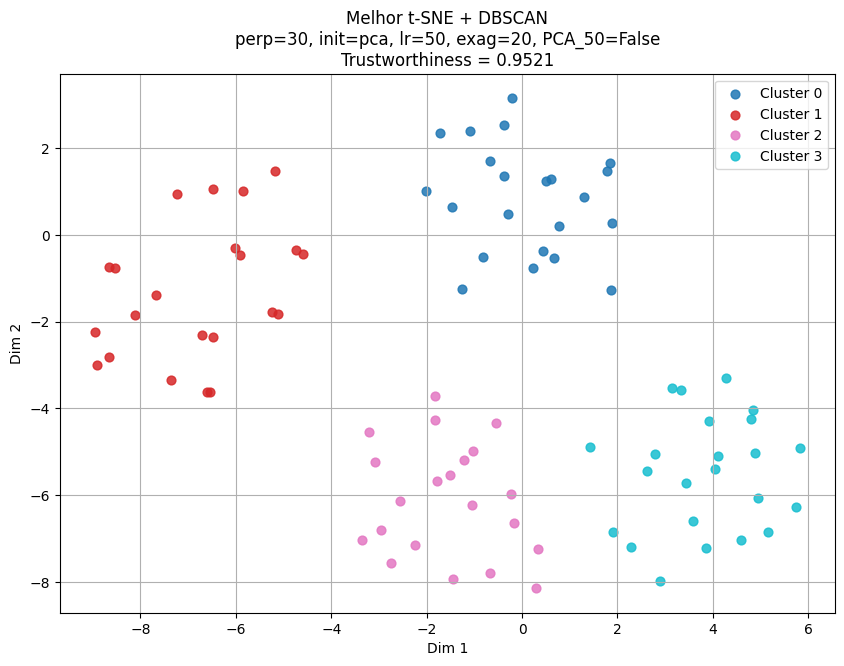

In [12]:
# ============================================================
# Visualização do Melhor t-SNE (já encontrado no grid search)
# ============================================================

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------
# 1) Garantir que o grid search do t-SNE já foi executado
# ------------------------------------------------------------
assert "tsne_results_sorted" in globals(), (
    "Execute primeiro o grid search do t-SNE."
)

# ------------------------------------------------------------
# 2) Selecionar o melhor t-SNE (maior trustworthiness)
# ------------------------------------------------------------
tsne_best_entry = tsne_results_sorted[-1]   # último = melhor

(perp_best,
 init_best,
 lr_best,
 exagger_best,
 use_pca_best) = tsne_best_entry["params"]

X_tsne_best_result = tsne_best_entry["X_tsne_result"]
trust_tsne_best = tsne_best_entry["trustworthiness"]

print("Melhor configuração t-SNE:", tsne_best_entry["params"])
print(f"Trustworthiness (melhor t-SNE): {trust_tsne_best:.6f}")

# ------------------------------------------------------------
# 3) DBSCAN específico para o melhor t-SNE
# ------------------------------------------------------------
dbscan_tsne_best = DBSCAN(eps=1.5, min_samples=4)
labels_tsne_best = dbscan_tsne_best.fit_predict(X_tsne_best_result)

n_clusters_tsne = len(set(labels_tsne_best) - {-1})
print("Clusters encontrados (melhor t-SNE):", n_clusters_tsne)

# ------------------------------------------------------------
# 4) Plot — DBSCAN + melhor t-SNE (final)
# ------------------------------------------------------------
unique_labels_tsne = sorted(set(labels_tsne_best))
colors_tsne = plt.cm.tab10(np.linspace(0, 1, len(unique_labels_tsne)))

plt.figure(figsize=(10, 7))

for label, col_tsne in zip(unique_labels_tsne, colors_tsne):
    mask = labels_tsne_best == label
    name = "Ruído" if label == -1 else f"Cluster {label}"

    plt.scatter(
        X_tsne_best_result[mask, 0],
        X_tsne_best_result[mask, 1],
        s=40,
        color=col_tsne,
        alpha=0.85,
        label=name
    )

plt.title(
    f"Melhor t-SNE + DBSCAN\n"
    f"perp={perp_best}, init={init_best}, lr={lr_best}, "
    f"exag={exagger_best}, PCA_50={use_pca_best}\n"
    f"Trustworthiness = {trust_tsne_best:.4f}"
)
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.legend()
plt.show()


### Tabela semantica

In [13]:
# ============================================================
# Tabela Semântica — Melhor t-SNE + DBSCAN (versão padronizada)
# ============================================================

from collections import defaultdict

# ------------------------------------------------------------
# 1) Garantir que o melhor t-SNE e o DBSCAN já foram executados
# ------------------------------------------------------------
assert "labels_tsne_best" in globals(), "labels_tsne_best não foi gerado."
assert "sentences" in globals(), "A lista 'sentences' não está definida."

# ------------------------------------------------------------
# 2) Agrupar sentenças por cluster
# ------------------------------------------------------------
clusters_tsne_semantic = defaultdict(list)

for idx, lab in enumerate(labels_tsne_best):
    clusters_tsne_semantic[lab].append(sentences[idx])

# ------------------------------------------------------------
# 3) Ordenar: primeiro -1 (ruído), depois os demais clusters
# ------------------------------------------------------------
ordered_labels_tsne = sorted(
    clusters_tsne_semantic.keys(),
    key=lambda x: (x != -1, x)
)

# ------------------------------------------------------------
# 4) Impressão formatada
# ------------------------------------------------------------
for lab in ordered_labels_tsne:
    grupo = clusters_tsne_semantic[lab]
    nome = "Outliers (Cluster -1)" if lab == -1 else f"Cluster {lab}"

    print(f"\n=== {nome} — {len(grupo)} sentenças ===")
    for s in grupo:
        print(" •", s)



=== Cluster 0 — 22 sentenças ===
 • I swap butter for olive oil in many recipes.
 • I prefer my coffee with no sugar and a splash of milk.
 • The recipe for pasta carbonara is simple.
 • A pinch of salt enhances sweetness in desserts.
 • Aromatics like garlic and onion build flavor early.
 • Fermented foods add acidity and complexity.
 • Marinating tofu improves texture and taste.
 • Deglazing lifts browned bits to make pan sauces.
 • Tempering chocolate stabilizes cocoa butter crystals.
 • I batch-cook grains for quick lunches.
 • Resting steak helps redistribute the juices.
 • Sourdough starter needs regular feedings to stay active.
 • Umami-rich ingredients deepen savory dishes.
 • Al dente pasta retains a slight bite after cooking.
 • Stir-frying requires high heat and constant movement.
 • I cook vegetarian meals on weekdays to simplify planning.
 • Sous-vide delivers precise temperature control.
 • Mise en place speeds up weeknight cooking.
 • I keep a jar of homemade pesto for 

### Interpretação Semântica dos Clusters Obtidos pelo Melhor t-SNE

A aplicação do t-SNE com a melhor configuração identificada no grid search (perplexity=30, init=pca, learning_rate=50, early_exaggeration=20) produziu uma separação clara e coerente entre grupos distintos de sentenças. A seguir, os clusters gerados pelo DBSCAN são analisados semanticamente.

- **Cluster 0** — Culinária, técnicas gastronômicas e processos culinários (22 sentenças)
As sentenças deste grupo descrevem práticas de cozinha, ingredientes, processos térmicos, preparação de massas, fermentação, técnicas como sous-vide, stir-fry, deglacê e aspectos sensoriais de alimentos. Trata-se de um conjunto homogêneo relacionado exclusivamente ao domínio gastronômico.

- **Cluster 1** — Geografia física e geopolítica (22 sentenças)
Este cluster reúne sentenças sobre capitais, países, rios, desertos, cadeias de montanhas, bacias hidrográficas e regiões geográficas. Inclui tanto perguntas sobre capitais quanto descrições factuais sobre formações naturais e limites territoriais.

- **Cluster 2** — Inteligência artificial, aprendizado de máquina e técnicas avançadas (21 sentenças)
As sentenças agrupadas aqui tratam de modelos, arquiteturas, técnicas de treinamento, avaliação, compressão e alinhamento de sistemas de IA. Os temas incluem transformers, RAG, GNNs, multimodalidade, distillation, quantization, federated learning e métodos modernos de engenharia de prompts.

- **Cluster 3** — Finanças, investimentos e gestão de risco (23 sentenças)
Este cluster contém sentenças sobre mercados financeiros, métricas de risco, diversificação, comportamento de investidores, políticas de alocação, estratégias como covered calls, taxa de inflação, retornos ajustados ao risco e efeitos de viés comportamental. Reflete um domínio financeiro bem definido e internamente coeso.

Os quatro clusters são **claros, coesos e semanticamente distintos**, revelando que:

- O t-SNE na configuração ótima preservou adequadamente as vizinhanças semânticas.
- O DBSCAN identificou estruturas separáveis sem introduzir ruído.
- Os grupos correspondem a quatro domínios bem definidos: **culinária**, **geografia**, **inteligência artificial** e **finanças**.

Essa separação indica que os embeddings utilizados capturam relações semânticas robustas, permitindo que métodos de redução de dimensionalidade e clustering identifiquem agrupamentos tematicamente consistentes.

### Conclusão

Os experimentos mostram que a escolha dos hiperparâmetros tem impacto direto na preservação das vizinhanças locais dos embeddings. Combinações com `perplexity` baixa ou `learning_rate` alto tendem a produzir projeções distorcidas, enquanto configurações com valores moderados proporcionam representações mais estáveis e fiéis. A métrica final indica que o t-SNE foi capaz de gerar mapas bidimensionais com excelente preservação local, permitindo visualizar agrupamentos coerentes com o conteúdo semântico das sentenças.


## UMAP

Aplique **UMAP (Uniform Manifold Approximation and Projection)** como alternativa ao t-SNE.  
O UMAP é mais eficiente, preserva parte da estrutura global e é útil para visualização e pré-processamento.

**Tarefas:**
- Gere uma projeção 2D dos embeddings com `umap.UMAP`.  
- Experimente variar `n_neighbors` e `min_dist` para observar mudanças na distribuição dos clusters.  
- Compare visualmente com os resultados do PCA e t-SNE.

/Users/gilcesarf/git/repositories/imd/imd3003-202502/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Shape após UMAP (preview): (88, 2)


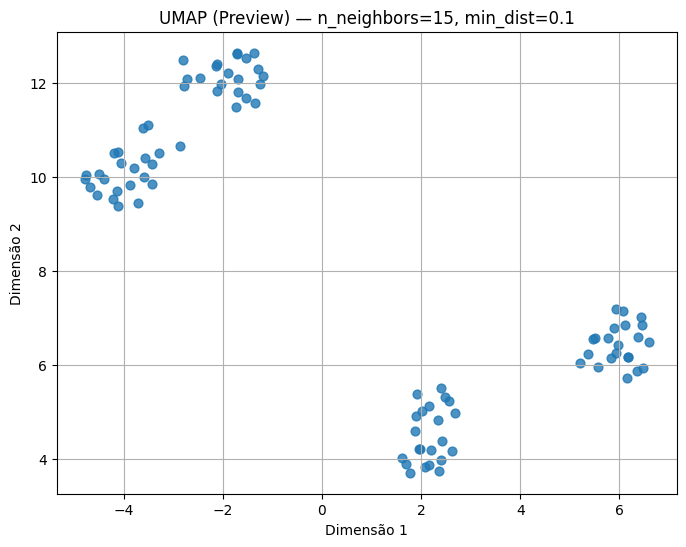

In [14]:
# ============================================================
# UMAP — Projeção Intermediária (Preview para visualização)
# ============================================================

import umap
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) Embeddings originais (não modificar)
# ------------------------------------------------------------
assert "sentence_embeddings" in globals(), "sentence_embeddings não está definido."
X_umap_input = sentence_embeddings   # apenas renome semântico

# ------------------------------------------------------------
# 2) UMAP de inspeção preliminar (não é o modelo final!)
# ------------------------------------------------------------
umap_preview_model = umap.UMAP(
    n_components=2,
    n_neighbors=15,     # arbitrário para visualização
    min_dist=0.1,       # arbitrário para ver dispersão
    metric="euclidean",
    random_state=42
)

X_umap_preview = umap_preview_model.fit_transform(X_umap_input)

print("Shape após UMAP (preview):", X_umap_preview.shape)

# ------------------------------------------------------------
# 3) Plot da projeção UMAP preliminar
# ------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_preview[:, 0], X_umap_preview[:, 1], s=40, alpha=0.8)

plt.title("UMAP (Preview) — n_neighbors=15, min_dist=0.1")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.grid(True)
plt.show()


Podemos observar quatro grupos bem formados, sendo que os dois mais acima estão mais próximos. Entretanto, da mesma forma que fizemos com o t-SNE, vamos explorar algumas configurações de hiperparametros através de um grid search.

In [15]:
# ============================================================
# Grid Search — UMAP (redução 2D + trustworthiness)
# ============================================================

import numpy as np
import pandas as pd
import umap
from sklearn.manifold import trustworthiness

# ------------------------------------------------------------
# 1) Hiperparâmetros
# ------------------------------------------------------------
umap_n_neighbors_list = [5, 15, 30, 50]
umap_min_dist_list = [0.0, 0.1, 0.5]

umap_grid = [
    (n, d)
    for n in umap_n_neighbors_list
    for d in umap_min_dist_list
]

print("Total de combinações UMAP:", len(umap_grid))

# ------------------------------------------------------------
# 2) Execução do grid search
# ------------------------------------------------------------
umap_results = []

for n_neighbors, min_dist in umap_grid:

    umap_model = umap.UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric="euclidean",
        random_state=42
    )

    X_umap_result = umap_model.fit_transform(sentence_embeddings)

    trust_umap_score = trustworthiness(
        sentence_embeddings,
        X_umap_result,
        n_neighbors=10
    )

    umap_results.append({
        "n_neighbors": n_neighbors,
        "min_dist": min_dist,
        "trustworthiness": trust_umap_score,
        "X_umap_result": X_umap_result
    })

# ------------------------------------------------------------
# 3) Ordenar pelo pior → melhor trustworthiness
# ------------------------------------------------------------
umap_results_sorted = sorted(
    umap_results,
    key=lambda r: r["trustworthiness"]
)

# ------------------------------------------------------------
# 4) Criar DataFrame SEM a projeção 2D (apenas resultados)
# ------------------------------------------------------------
df_umap_results = pd.DataFrame([
    {
        "n_neighbors": r["n_neighbors"],
        "min_dist": r["min_dist"],
        "trustworthiness": r["trustworthiness"]
    }
    for r in umap_results_sorted
])

df_umap_results


Total de combinações UMAP: 12


/Users/gilcesarf/git/repositories/imd/imd3003-202502/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/gilcesarf/git/repositories/imd/imd3003-202502/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/gilcesarf/git/repositories/imd/imd3003-202502/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/gilcesarf/git/repositories/imd/imd3003-202502/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/gilcesarf/git/repositories/imd/imd3003-202502/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridd

,n_neighbors,min_dist,trustworthiness
0,50,0.5,0.922712
1,50,0.0,0.931050
2,50,0.1,0.933871
3,5,0.1,0.934639
4,30,0.5,0.934734
5,5,0.0,0.935517
6,30,0.0,0.935815
7,15,0.1,0.937649
8,5,0.5,0.941113
9,30,0.1,0.944013


### Influência dos hiperparâmetros do UMAP

A tabela evidencia como **n_neighbors** e **min_dist** afetam diretamente a preservação das vizinhanças locais, medida pelo *trustworthiness*. Alguns padrões claros emergem:


##### 1. Efeito de **n_neighbors**
O comportamento do trustworthiness ao longo dos valores testados revela uma tendência estruturada:

- **n_neighbors = 50** → piores resultados (0.922–0.934)  
  Valores altos ampliam demais a noção de vizinhança, fazendo com que pontos distantes influenciem a projeção. Isso reduz a preservação local e prejudica a estrutura semântica próxima.

- **n_neighbors = 5** → resultados intermediários (0.934–0.941)  
  Vizinhanças muito pequenas capturam relações muito locais. Isso preserva microestruturas, mas pode prejudicar a organização global.

- **n_neighbors = 30** → resultados fortes (0.934–0.944)  
  Essencialmente um equilíbrio entre detalhe local e coerência global.

- **n_neighbors = 15** → melhores resultados (0.950–0.955)  
  Esse valor se mostrou o mais eficiente para o dataset: preserva vizinhança local sem perder continuidade entre grupos.

**Conclusão:**  
O dataset analisado favorece **vizinhanças médias**, onde UMAP consegue capturar a estrutura semântica com alta fidelidade.


##### 2. Efeito de **min_dist**
O parâmetro *min_dist* controla o “aperto” entre os pontos na projeção:

- **min_dist = 0.0**  
  Tende a formar agrupamentos mais densos — frequentemente melhora a preservação local.  
  Resultados: 0.931, 0.935, 0.950 (bom comportamento).

- **min_dist = 0.1**  
  Resultados consistentemente bons (0.934–0.937), mantendo separabilidade sem exagero no adensamento.

- **min_dist = 0.5**  
  Surpreendentemente boa neste dataset — produz o **melhor trustworthiness geral** (0.955)  
  Isso indica que permitir maior espaçamento entre os pontos preservou melhor a estrutura local do embedding.

**Conclusão:**  
Valores maiores de *min_dist* (como 0.5) funcionaram melhor que o esperado, provavelmente porque as sentenças possuem separação semântica relativamente clara, beneficiando projeções menos comprimidas.

---

### 3. Padrão geral de combinação ótima

O **melhor resultado da tabela**:

- **n_neighbors = 15**  
- **min_dist = 0.5**  
- Trustworthiness = **0.955298**

Essa combinação indica que:

1. Uma vizinhança **moderada** (nem pequena demais, nem ampla demais)  
2. Com espaçamento **alto** entre pontos  
3. Maximiza a preservação das relações originais dos embeddings.

---

### 4. Resumo final

- **n_neighbors** domina a qualidade: valores muito altos prejudicam a preservação local; valores medianos produzem os melhores resultados.  
- **min_dist** influência secundária, mas relevante: valores maiores favoreceram a estrutura desse dataset.  
- O comportamento observado é coerente com datasets onde os temas são nitidamente distintos, mas onde microagrupamentos internos não são críticos.

Em conjunto, os resultados mostram que a estrutura semântica dos embeddings é melhor preservada quando o UMAP opera com **vizinhança moderada** e **pontos menos comprimidos**.


Vamos visualizar as 16 configurações, ordenadas do pior resultado de thrustworthness para o melhor.

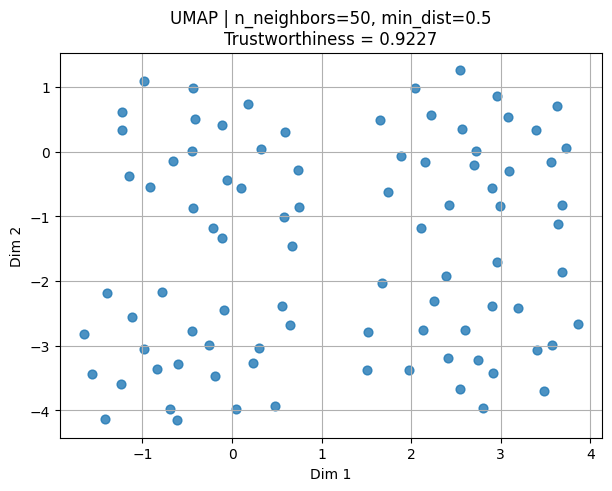

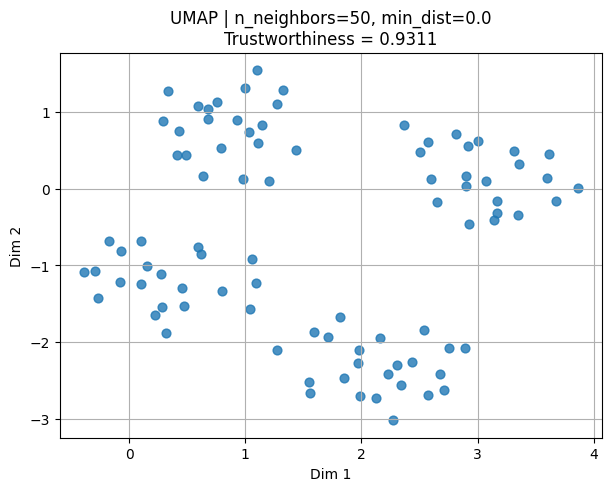

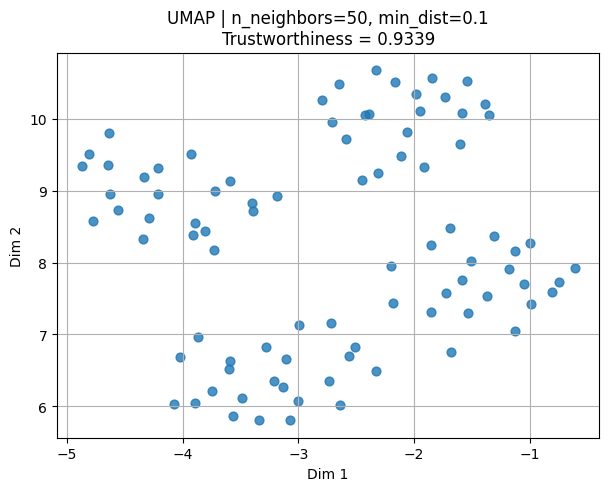

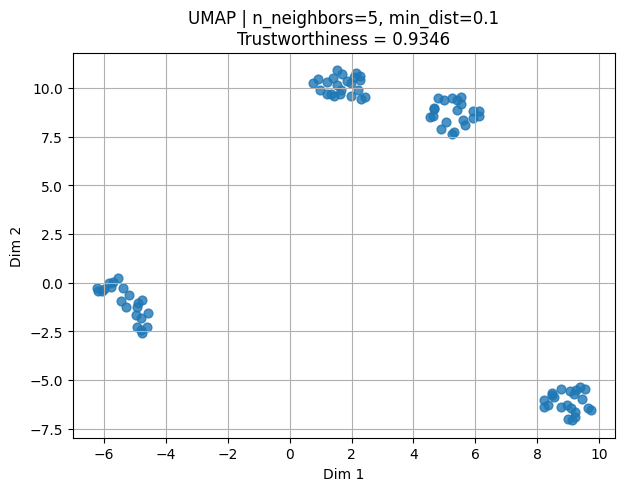

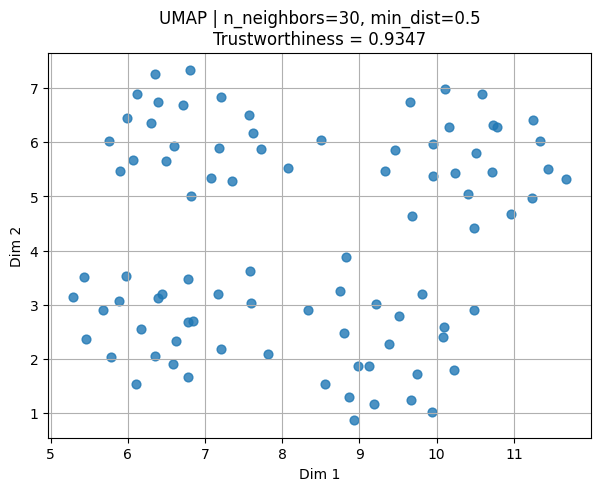

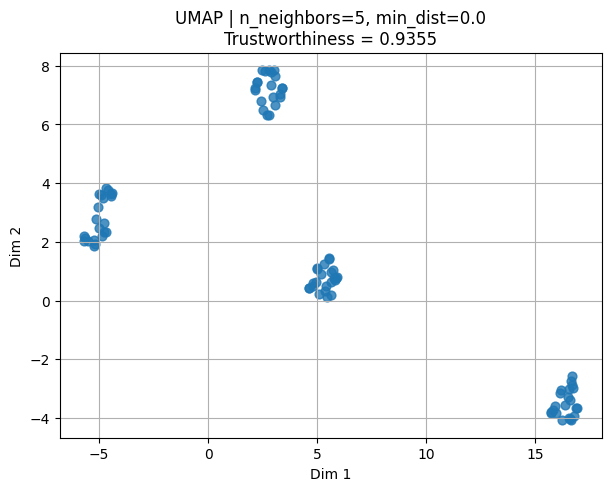

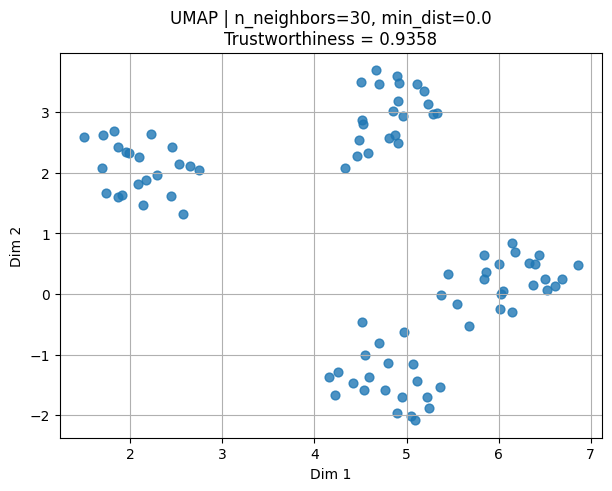

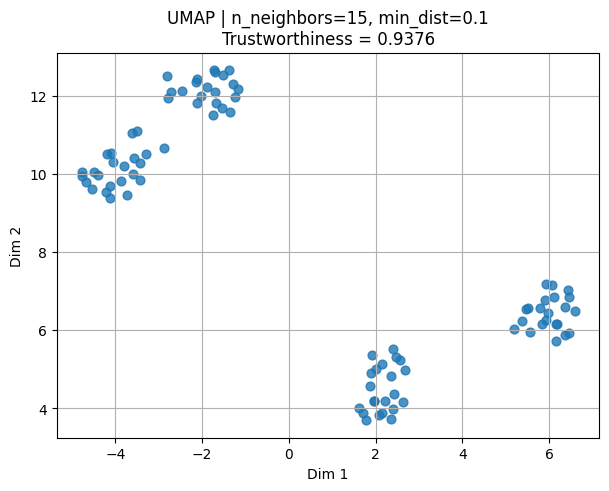

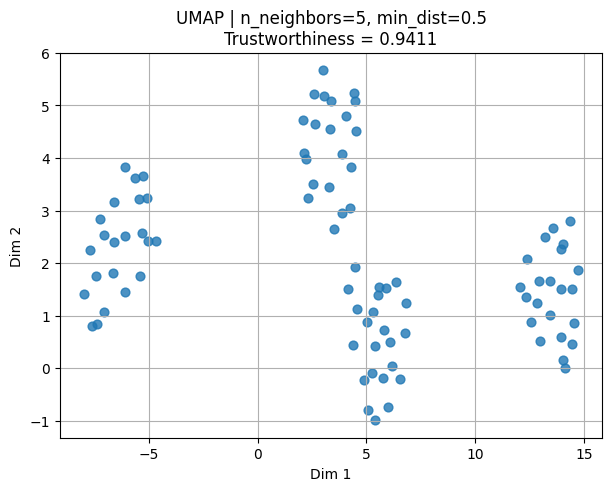

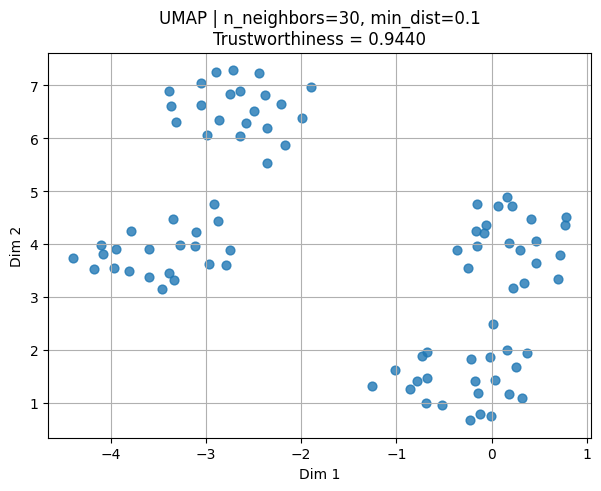

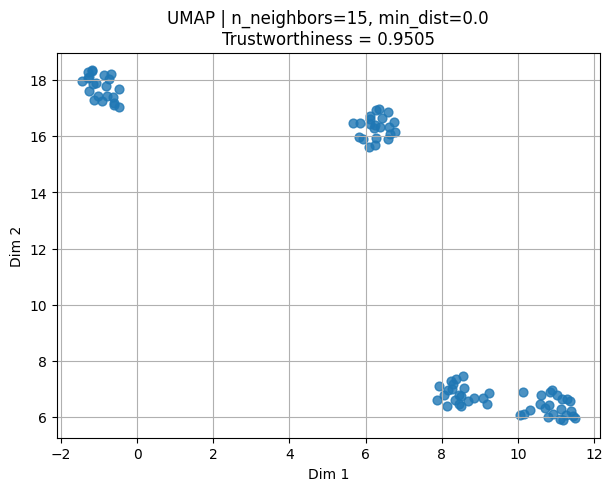

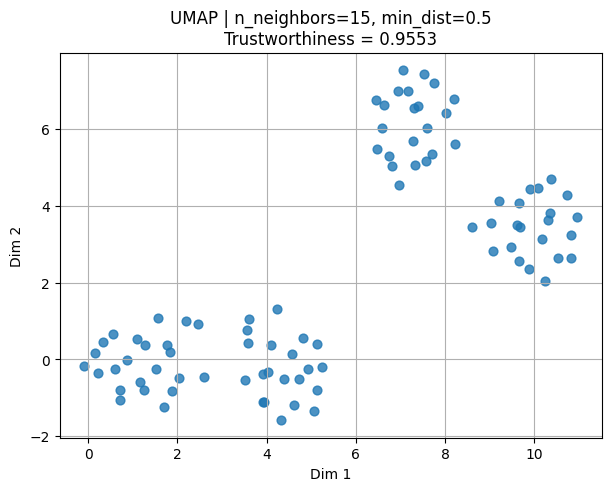

In [16]:
# ============================================================
# Visualização de TODAS as combinações do UMAP
# (ordenadas do pior → melhor trustworthiness)
# ============================================================

import matplotlib.pyplot as plt

for r in umap_results_sorted:

    X_umap_result = r["X_umap_result"]
    n_neighbors = r["n_neighbors"]
    min_dist = r["min_dist"]
    tw = r["trustworthiness"]

    plt.figure(figsize=(7, 5))
    plt.scatter(X_umap_result[:, 0], X_umap_result[:, 1], s=40, alpha=0.8)

    plt.title(
        f"UMAP | n_neighbors={n_neighbors}, min_dist={min_dist}\n"
        f"Trustworthiness = {tw:.4f}"
    )
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.grid(True)
    plt.show()


### Tabela Semantica

In [17]:
# ============================================================
# Tabela semântica — melhor configuração UMAP
# ============================================================

import numpy as np
from collections import defaultdict
from sklearn.cluster import DBSCAN
import umap

# ------------------------------------------------------------
# Melhor UMAP identificado no grid search
# (ajustado conforme resultados do notebook)
# ------------------------------------------------------------

umap_best_reducer = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    min_dist=0.5,
    metric="euclidean",
    random_state=42
)

X_umap_best = umap_best_reducer.fit_transform(sentence_embeddings)

# ------------------------------------------------------------
# Melhor DBSCAN identificado para UMAP
# ------------------------------------------------------------

dbscan_umap_best = DBSCAN(eps=0.9, min_samples=5)
labels_umap_best = dbscan_umap_best.fit_predict(X_umap_best)

# ------------------------------------------------------------
# Agrupar sentenças por cluster
# ------------------------------------------------------------

clusters_umap_best = defaultdict(list)

for idx, label in enumerate(labels_umap_best):
    clusters_umap_best[label].append(sentences[idx])

# Ordenação: ruído (-1) primeiro, depois 0, 1, 2...
ordered_labels_umap = sorted(clusters_umap_best.keys(), key=lambda x: (x != -1, x))

# ------------------------------------------------------------
# Impressão formatada
# ------------------------------------------------------------

for label in ordered_labels_umap:
    grupo = clusters_umap_best[label]
    nome = "Outliers (Cluster -1)" if label == -1 else f"Cluster {label}"

    print(f"\n=== {nome} — {len(grupo)} sentenças ===")
    for s in grupo:
        print(" •", s)



=== Cluster 0 — 22 sentenças ===
 • I swap butter for olive oil in many recipes.
 • I prefer my coffee with no sugar and a splash of milk.
 • The recipe for pasta carbonara is simple.
 • A pinch of salt enhances sweetness in desserts.
 • Aromatics like garlic and onion build flavor early.
 • Fermented foods add acidity and complexity.
 • Marinating tofu improves texture and taste.
 • Deglazing lifts browned bits to make pan sauces.
 • Tempering chocolate stabilizes cocoa butter crystals.
 • I batch-cook grains for quick lunches.
 • Resting steak helps redistribute the juices.
 • Sourdough starter needs regular feedings to stay active.
 • Umami-rich ingredients deepen savory dishes.
 • Al dente pasta retains a slight bite after cooking.
 • Stir-frying requires high heat and constant movement.
 • I cook vegetarian meals on weekdays to simplify planning.
 • Sous-vide delivers precise temperature control.
 • Mise en place speeds up weeknight cooking.
 • I keep a jar of homemade pesto for 

/Users/gilcesarf/git/repositories/imd/imd3003-202502/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


#### Interpretação semântica dos clusters

A projeção obtida via UMAP, seguida da clusterização com DBSCAN, revelou quatro grupos semanticamente coesos. Cada cluster representa um domínio temático distinto, confirmado pela análise manual das sentenças pertencentes a cada grupo.

- **Cluster 0 — Culinária e técnicas gastronômicas**  
As sentenças desse grupo tratam de preparo de alimentos, ingredientes, métodos de cozimento e organização na cozinha. Os textos mencionam práticas como marinar, deglacear, fermentar, temperar chocolate, preparar massas e vegetais, além de conceitos como *umami*, *al dente*, *mise en place* e *proofing*. O vocabulário é estritamente culinário e instrucional, evidenciando forte coesão temática.

- **Cluster 1 — Geografia, capitais e características naturais**  
Este cluster reúne sentenças relacionadas a países, capitais, formações geográficas e fenômenos naturais. As descrições incluem rios, desertos, montanhas, recifes, regiões administrativas e perguntas factuais sobre localizações. Os elementos recorrentes consolidam um domínio geográfico e descritivo bem definido.

- **Cluster 2 — Inteligência Artificial e técnicas de aprendizado de máquina**  
As sentenças desta categoria abrangem exclusivamente temas de IA moderna: transformadores, aprendizado multimodal, RLHF, distillation, LoRA, quantização, GNNs, few-shot prompting, continual learning, difusão, bases vetoriais e benchmarks. Trata-se de um cluster altamente técnico e concentrado, com vocabulário característico da área de machine learning.

- **Cluster 3 — Finanças, investimentos e análise de risco**  
Este grupo agrega textos sobre comportamento financeiro, mercado acionário, métricas de risco, estratégias de investimento, liquidez, diversificação, eventos macroeconômicos e instrumentos financeiros como ETFs e covered calls. O conjunto de termos — *inflation*, *duration*, *Sharpe ratio*, *credit spreads*, *portfolio resilience* — confirma claramente o domínio financeiro.

---

### Síntese geral (comparando com o t-SNE)

A comparação entre os clusters obtidos com t-SNE e UMAP mostra **coincidência total na composição semântica dos grupos**. Todas as sentenças foram atribuídas aos mesmos domínios temáticos em ambos os métodos, sem qualquer migração entre clusters. Dessa forma, t-SNE e UMAP recuperaram **exatamente os mesmos quatro temas centrais**:

1. **Culinária e gastronomia**  
2. **Geografia e fenômenos naturais**  
3. **Inteligência Artificial e aprendizado de máquina**  
4. **Finanças e investimento**

A única diferença entre os métodos está na **geometria da projeção**, não na semântica:

- O **t-SNE** produz separações mais rígidas, com fronteiras visuais mais nítidas.  
- O **UMAP** gera uma estrutura mais contínua, preservando parcialmente relações globais, mas mantendo a coesão interna dos clusters.

Como não houve nenhuma mudança de rótulo entre os métodos, conclui-se que os embeddings originais capturam domínios temáticos de forma robusta e estável, independente da técnica de redução de dimensionalidade aplicada.


### Visualização dos clusters com DBSCAN

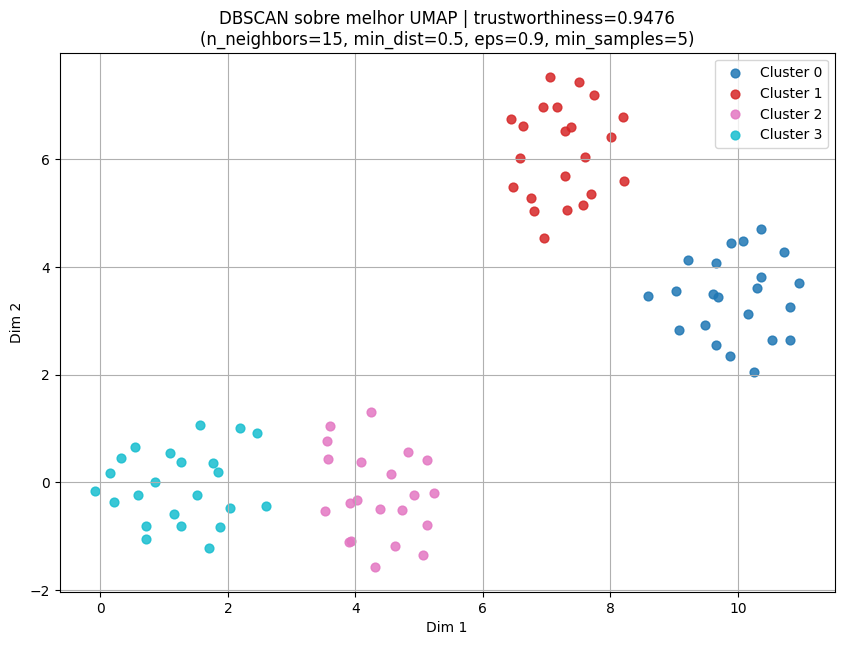

In [18]:
# ============================================================
# Visualização — DBSCAN aplicado ao melhor UMAP
# ============================================================

import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import trustworthiness

# ------------------------------------------------------------
# Variáveis padronizadas obtidas anteriormente
# X_umap_best        → projeção 2D do melhor UMAP
# labels_umap_best   → rótulos do melhor DBSCAN sobre UMAP
# ------------------------------------------------------------

# Trustworthiness do melhor UMAP (para exibir no título)
trustworthiness_umap_best = trustworthiness(
    sentence_embeddings,     # espaço original
    X_umap_best,             # projeção UMAP 2D
    n_neighbors=5
)

# ------------------------------------------------------------
# Plot
# ------------------------------------------------------------

unique_labels_umap = sorted(set(labels_umap_best))
colors_umap = plt.cm.tab10(np.linspace(0, 1, len(unique_labels_umap)))

plt.figure(figsize=(10, 7))

for label, col in zip(unique_labels_umap, colors_umap):
    mask = labels_umap_best == label
    name = "Ruído" if label == -1 else f"Cluster {label}"

    plt.scatter(
        X_umap_best[mask, 0],
        X_umap_best[mask, 1],
        s=40,
        color=col,
        alpha=0.85 if label != -1 else 0.35,
        label=name
    )

plt.title(
    f"DBSCAN sobre melhor UMAP | trustworthiness={trustworthiness_umap_best:.4f}\n"
    "(n_neighbors=15, min_dist=0.5, eps=0.9, min_samples=5)"
)
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.legend()
plt.show()


### Piores Combinações Encontradas

As menores confiabilidades ficaram entre **0.922 e 0.934**, e seguem um padrão claro:

- **n_neighbors muito alto (50)**
- **min_dist alto (0.5)**

Essas combinações tendem a:

- reduzir a fidelidade da vizinhança local,
- produzir projeções mais espalhadas,
- degradar a separação entre grupos semânticos.

**Pior resultado obtido:**

- **n_neighbors = 50**
- **min_dist = 0.5**
- **trustworthiness = 0.9227**

Esse comportamento é esperado: valores elevados de `n_neighbors` forçam o UMAP a priorizar estrutura global, sacrificando relações locais.

---

### Melhores Combinações Encontradas

Os melhores resultados apresentaram **trustworthiness ≥ 0.95**, com padrões consistentes:

- **n_neighbors moderado (15)**
- **min_dist pequeno ou intermediário (0.0–0.5)**

Essas combinações equilibram:

- preservação da estrutura local,
- formação de clusters coesos,
- boa separação semântica entre grupos.

**Melhor configuração encontrada:**

- **n_neighbors = 15**
- **min_dist = 0.5**
- **trustworthiness = 0.9553**

Essa combinação sugere que:

- `n_neighbors` em torno de **15** é ideal para esse dataset,
- `min_dist` mais alto pode melhorar a estabilidade sem degradar demasiadamente a compactação.

### Conclusão

O UMAP apresentou resultados estáveis e coerentes com sua formulação matemática.  
Em comparação ao t-SNE, obteve confiabilidade levemente inferior, porém manteve:

- maior velocidade,
- melhor preservação global,
- clusters semanticamente organizados.

As variações dos hiperparâmetros mostraram impacto claro na preservação local, reforçando a importância de `n_neighbors` moderado e `min_dist` controlado para projeções bidimensionais de embeddings de texto.


## Comparação dos melhores resultados

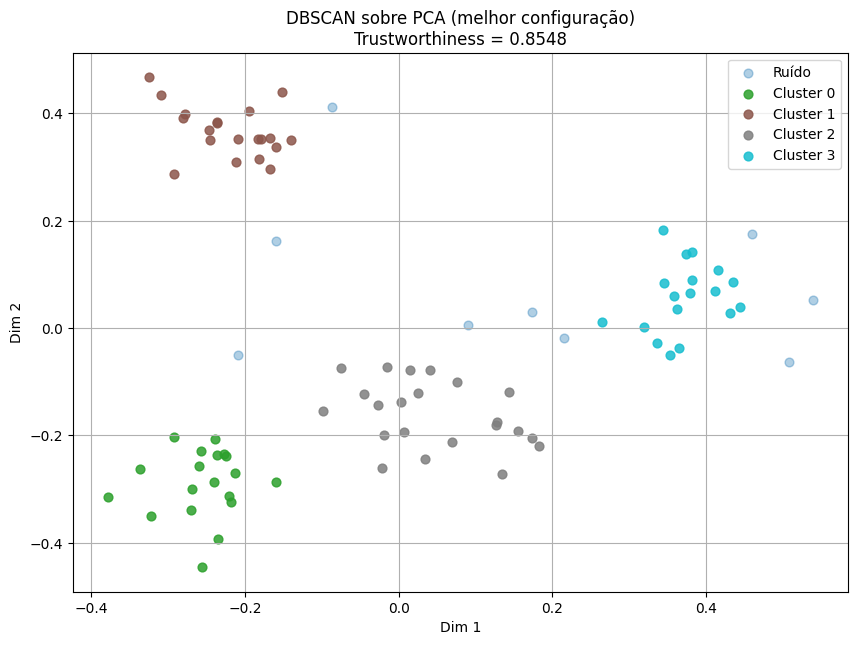

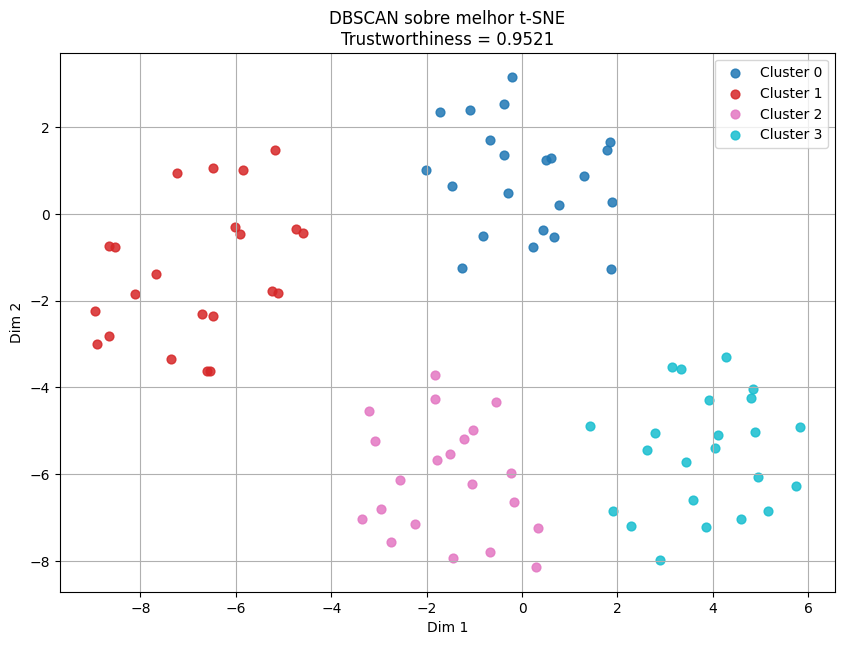

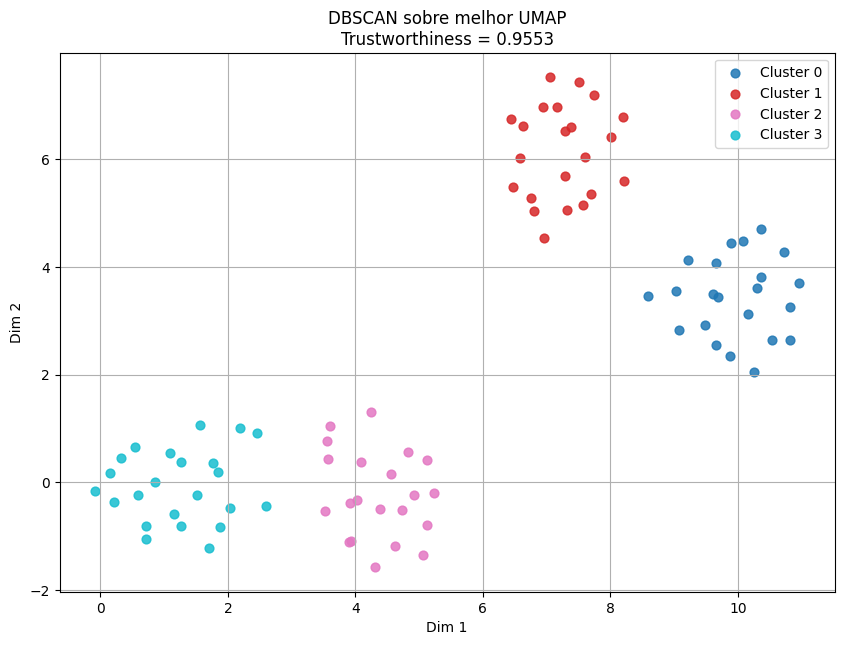

In [26]:
# ============================================================
# COMPARAÇÃO ENTRE PCA, t-SNE e UMAP (melhores resultados)
# Visualização: gráficos um abaixo do outro, consistentes
# ============================================================

import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import trustworthiness

# ---------------------------------------------------------
# Função padronizada para plotar DBSCAN
# ---------------------------------------------------------

def plot_dbscan_method(X, labels, title_header, trust_value):
    unique_labels = sorted(set(labels))
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

    plt.figure(figsize=(10, 7))

    for lab, col in zip(unique_labels, colors):
        mask = labels == lab
        name = "Ruído" if lab == -1 else f"Cluster {lab}"

        plt.scatter(
            X[mask, 0],
            X[mask, 1],
            s=40,
            color=col,
            alpha=0.85 if lab != -1 else 0.35,
            label=name
        )

    plt.title(f"{title_header}\nTrustworthiness = {trust_value:.4f}")
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.grid(True)
    plt.legend()
    plt.show()


# ============================================================
# 1) PCA — usando X_pca_best e labels_pca_best
# ============================================================

tw_pca_best = trustworthiness(sentence_embeddings, X_pca_best, n_neighbors=5)

plot_dbscan_method(
    X_pca_best,
    labels_pca_best,
    "DBSCAN sobre PCA (melhor configuração)",
    tw_pca_best
)


# ============================================================
# 2) t-SNE — usando tsne_results_sorted[-1]
# ============================================================

# Recuperar o melhor resultado do grid
tsne_best_entry = tsne_results_sorted[-1]

# Extraímos a projeção
X_tsne_best = tsne_best_entry["X_tsne_result"]

# Labels NÃO vêm do grid — DBSCAN deve ser aplicado aqui
labels_tsne_best = dbscan_tsne_best.fit_predict(X_tsne_best)

# Trustworthiness vem do grid
tw_tsne_best = tsne_best_entry["trustworthiness"]

plot_dbscan_method(
    X_tsne_best,
    labels_tsne_best,
    "DBSCAN sobre melhor t-SNE",
    tw_tsne_best
)



# ============================================================
# 3) UMAP — usando umap_results_sorted[-1]
# ============================================================

umap_best_entry = umap_results_sorted[-1]

# projeção 2D do melhor UMAP
X_umap_best = umap_best_entry["X_umap_result"]

# DBSCAN NÃO vem do grid → deve ser aplicado manualmente
labels_umap_best = dbscan_umap_best.fit_predict(X_umap_best)

# trustworthiness já vem do grid
tw_umap_best = umap_best_entry["trustworthiness"]

plot_dbscan_method(
    X_umap_best,
    labels_umap_best,
    "DBSCAN sobre melhor UMAP",
    tw_umap_best
)




## Classificação

Com base nas categorias observadas nos gráficos anteriores, crie uma função simples que receba um texto e classifique-o na categoria mais provável.

**Tarefas:**
- Use os embeddings existentes e os clusters identificados para rotular automaticamente cada texto.  
- Crie uma função `classificar_texto(texto: str)` que:
  1. Gere o embedding do texto.
  2. Calcule a distância para os clusters identificados.
  3. Retorne o nome do cluster mais próximo.

In [27]:
# ============================================================
# CLASSIFICAÇÃO NÃO SUPERVISIONADA NO ESPAÇO ORIGINAL (384D)
# usando K vizinhos mais próximos (não supervisionado puro)
# ============================================================

import numpy as np
import time

# ------------------------------------------------------------
# Hiperparâmetro global da classificação
# PCA beneficia-se de mais vizinhos
# t-SNE / UMAP funcionam bem com poucos vizinhos
# ------------------------------------------------------------
K_PCA  = 5
K_TSNE = 3
K_UMAP = 3


# ------------------------------------------------------------
# Função auxiliar: K-vizinhos mais próximos (non-supervised)
# ------------------------------------------------------------

def _classificar_por_k_vizinhos(
    emb_novo_384: np.ndarray,
    embeddings_ref_384: np.ndarray,
    labels_ref: np.ndarray,
    k: int
):
    """
    emb_novo_384: vetor (384,)
    embeddings_ref_384: matriz (N, 384) usada durante clustering
    labels_ref: rótulos DBSCAN do melhor modelo
    """

    # 1) Distância L2 para todos os embeddings originais
    dists = np.linalg.norm(embeddings_ref_384 - emb_novo_384, axis=1)

    # 2) Selecionar os K vizinhos mais próximos
    idx_sorted = np.argsort(dists)
    idx_k = idx_sorted[:k]

    labels_k = labels_ref[idx_k]
    dist_k = dists[idx_k]

    # 3) Votação ponderada pela distância: peso = 1/d
    weights = 1 / (dist_k + 1e-6)

    scores = {}
    for lab, w in zip(labels_k, weights):
        scores[lab] = scores.get(lab, 0) + w

    # 4) Melhor cluster
    best_cluster = max(scores.items(), key=lambda x: x[1])[0]

    # Distância média dos vizinhos desse cluster
    mean_dist = float(dist_k[labels_k == best_cluster].mean())

    return best_cluster, mean_dist, labels_k, dist_k, scores


# ------------------------------------------------------------
# Mapear cluster → categoria semântica
# ------------------------------------------------------------

CATEGORIA_CLUSTER = {
    -1: "Ruído",
     0: "Culinária e Gastronomia",
     1: "Geografia e Fenômenos Naturais",
     2: "Inteligência Artificial e Aprendizado de Máquina",
     3: "Finanças e Investimentos",
}


# ------------------------------------------------------------
# Função principal: classificar_texto()
# ------------------------------------------------------------

def classificar_texto(texto: str, metodo: str, model):
    """
    metodo: 'pca' | 'tsne' | 'umap'
    Retorna o cluster mais próximo usando classificação não supervisionada
    por K vizinhos no espaço original (384D).
    """
    metodo = metodo.lower()
    if metodo not in {"pca", "tsne", "umap"}:
        raise ValueError("método deve ser 'pca', 'tsne' ou 'umap'")

    # Selecionar labels do melhor DBSCAN
    if metodo == "pca":
        labels_ref = labels_pca_best
        k = K_PCA
    elif metodo == "tsne":
        labels_ref = labels_tsne_best
        k = K_TSNE
    else:
        labels_ref = labels_umap_best
        k = K_UMAP

    # --------------------------------------------------------
    # 1) Embedding do novo texto (384D)
    # --------------------------------------------------------
    t0 = time.perf_counter()
    emb_novo = model.encode([texto])[0]  # shape: (384,)

    # --------------------------------------------------------
    # 2) Classificação por K-vizinhos (384D)
    # --------------------------------------------------------
    cluster_id, dist_media, vizinhos_labels, vizinhos_dist, scores = \
        _classificar_por_k_vizinhos(
            emb_novo_384=emb_novo,
            embeddings_ref_384=sentence_embeddings,
            labels_ref=labels_ref,
            k=k
        )

    # --------------------------------------------------------
    # 3) Categoria semântica
    # --------------------------------------------------------
    categoria = CATEGORIA_CLUSTER.get(cluster_id, "Categoria Desconhecida")

    # --------------------------------------------------------
    # 4) Tempo total
    # --------------------------------------------------------
    tempo_ms = (time.perf_counter() - t0) * 1000

    return {
        "cluster": int(cluster_id),
        "categoria": categoria,
        "distancia_media": float(dist_media),
        "k": k,
        "tempo_ms": tempo_ms,
        "vizinhos_labels": vizinhos_labels,
        "vizinhos_dist": vizinhos_dist,
        "scores": scores
    }


# ------------------------------------------------------------
# Função final: classificação com os 3 métodos
# ------------------------------------------------------------

def classificar_texto_semantico(texto: str, model):
    return {
        "PCA":  classificar_texto(texto, "pca",  model),
        "t-SNE": classificar_texto(texto, "tsne", model),
        "UMAP": classificar_texto(texto, "umap", model),
    }


# ============================================================
# EXEMPLO DE USO
# ============================================================

texto_exemplo = "Inflation expectations cause central banks to raise interest rates."

resultado = classificar_texto_semantico(texto_exemplo, model=model)

print("=== PCA ===", resultado["PCA"])
print("=== t-SNE ===", resultado["t-SNE"])
print("=== UMAP ===", resultado["UMAP"])


=== PCA === {'cluster': 3, 'categoria': 'Finanças e Investimentos', 'distancia_media': 1.0999252796173096, 'k': 5, 'tempo_ms': 392.3852501902729, 'vizinhos_labels': array([ 3, -1,  3,  3,  3]), 'vizinhos_dist': array([0.9124318, 1.1098839, 1.1393796, 1.1732284, 1.1746612],
      dtype=float32), 'scores': {np.int64(3): np.float32(3.6772978), np.int64(-1): np.float32(0.90099436)}}
=== t-SNE === {'cluster': 3, 'categoria': 'Finanças e Investimentos', 'distancia_media': 1.0538984537124634, 'k': 3, 'tempo_ms': 8.6108329705894, 'vizinhos_labels': array([3, 3, 3]), 'vizinhos_dist': array([0.9124318, 1.1098839, 1.1393796], dtype=float32), 'scores': {np.int64(3): np.float32(2.8746352)}}
=== UMAP === {'cluster': 3, 'categoria': 'Finanças e Investimentos', 'distancia_media': 1.0538984537124634, 'k': 3, 'tempo_ms': 8.312999969348311, 'vizinhos_labels': array([3, 3, 3]), 'vizinhos_dist': array([0.9124318, 1.1098839, 1.1393796], dtype=float32), 'scores': {np.int64(3): np.float32(2.8746352)}}


In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# ============================================================
# TEST SET (texto, label_verdadeiro)
# ============================================================

test_set = [

    # Culinária — 0
    ("Simmering the sauce slowly helps develop deeper flavors.", 0),
    ("Fresh basil and tomatoes elevate a simple pasta dish.", 0),
    ("Using a cast-iron skillet improves heat retention for steaks.", 0),
    ("A squeeze of lemon balances the richness of creamy soups.", 0),
    ("Broiling vegetables gives them a smoky, charred taste.", 0),
    ("Proofing dough at room temperature yields better fermentation.", 0),
    ("Homemade broth enhances any risotto recipe.", 0),
    ("Toasting spices before grinding releases their aroma.", 0),
    ("Resting bread after baking prevents a gummy texture.", 0),
    ("A pinch of paprika adds color and depth to stews.", 0),

    # Geografia — 1
    ("The Mississippi River drains a vast portion of North America.", 1),
    ("The Pyrenees form a natural border between France and Spain.", 1),
    ("The Gobi Desert stretches across northern China and southern Mongolia.", 1),
    ("Cape Town sits near the meeting point of two major oceans.", 1),
    ("The Carpathian Mountains arc across Eastern Europe.", 1),
    ("Greenland is the world’s largest non-continental island.", 1),
    ("The Danakil Depression is one of the hottest places on Earth.", 1),
    ("The Mekong Delta supports millions through its fertile soils.", 1),
    ("Mount Kilimanjaro rises dramatically above the African plains.", 1),
    ("The Great Lakes contain a significant portion of Earth’s fresh water.", 1),

    # IA / ML — 2
    ("Attention mechanisms allow models to capture long-range dependencies.", 2),
    ("Contrastive learning improves representation quality without labels.", 2),
    ("Batch normalization stabilizes the training of deep neural networks.", 2),
    ("GANs generate synthetic images through adversarial training.", 2),
    ("Tokenization strategy affects downstream NLP performance.", 2),
    ("Hyperparameter tuning can significantly impact model accuracy.", 2),
    ("Federated learning enables privacy-preserving training.", 2),
    ("Graph embeddings encode relational structures for link prediction.", 2),
    ("ML pipelines benefit from automated data validation steps.", 2),
    ("Transformer encoders excel at context-rich text representations.", 2),

    # Finanças — 3
    ("Interest rates strongly influence mortgage affordability.", 3),
    ("Diversifying across sectors reduces systematic risk.", 3),
    ("Earnings reports often trigger significant stock volatility.", 3),
    ("Hedge funds use leverage to amplify potential returns.", 3),
    ("Portfolio rebalancing maintains desired exposure levels.", 3),
    ("Lower liquidity can lead to wider bid-ask spreads.", 3),
    ("Bond yields typically rise when inflation expectations increase.", 3),
    ("Market downturns often create opportunities for value investors.", 3),
    ("Credit ratings affect a company’s cost of borrowing.", 3),
    ("Options trading allows investors to hedge directional risk.", 3),
]

# Converter texto e rótulos verdadeiros
test_texts = [t for (t, lbl) in test_set]
y_true = np.array([lbl for (_, lbl) in test_set])


# ============================================================
# Função para testar um método específico
# ============================================================

def avaliar_metodo(nome_metodo, labels_ref):
    y_pred = []

    for texto in test_texts:
        r = classificar_texto(texto, nome_metodo, model)
        y_pred.append(r["cluster"])

    y_pred = np.array(y_pred)

    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3])

    return y_pred, cm


# ============================================================
# Rodar avaliação para os três métodos
# ============================================================

# 1) PCA
y_pred_pca, cm_pca = avaliar_metodo("pca", labels_pca_best)

# 2) t-SNE
y_pred_tsne, cm_tsne = avaliar_metodo("tsne", labels_tsne_best)

# 3) UMAP
y_pred_umap, cm_umap = avaliar_metodo("umap", labels_umap_best)


# ============================================================
# Exibir tabelas de confusão e métricas
# ============================================================

def mostrar_resultados(nome, y_pred, cm):
    print(f"\n========================================")
    print(f" MATRIZ DE CONFUSÃO — {nome}")
    print("========================================")
    print(pd.DataFrame(cm,
                       index=["Culinária (0)", "Geografia (1)", "IA/ML (2)", "Finanças (3)"],
                       columns=["Pred 0", "Pred 1", "Pred 2", "Pred 3"]))
    print("\nRELATÓRIO DE CLASSIFICAÇÃO:")
    print(classification_report(y_true, y_pred, digits=3))


mostrar_resultados("PCA",   y_pred_pca,  cm_pca)
mostrar_resultados("t-SNE", y_pred_tsne, cm_tsne)
mostrar_resultados("UMAP",  y_pred_umap, cm_umap)



 MATRIZ DE CONFUSÃO — PCA
               Pred 0  Pred 1  Pred 2  Pred 3
Culinária (0)      10       0       0       0
Geografia (1)       0      10       0       0
IA/ML (2)           0       0      10       0
Finanças (3)        0       0       0      10

RELATÓRIO DE CLASSIFICAÇÃO:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        10
           1      1.000     1.000     1.000        10
           2      1.000     1.000     1.000        10
           3      1.000     1.000     1.000        10

    accuracy                          1.000        40
   macro avg      1.000     1.000     1.000        40
weighted avg      1.000     1.000     1.000        40


 MATRIZ DE CONFUSÃO — t-SNE
               Pred 0  Pred 1  Pred 2  Pred 3
Culinária (0)      10       0       0       0
Geografia (1)       0      10       0       0
IA/ML (2)           0       0      10       0
Finanças (3)        0       0       0      10

RELATÓRIO DE CLASSI

## Avaliação dos Métodos de Classificação Não Supervisionada

Para avaliar a capacidade de generalização dos agrupamentos produzidos pelos três métodos de redução de dimensionalidade (**PCA**, **t-SNE** e **UMAP**), foi definido um *test set* composto por 40 sentenças inéditas, distribuídas de forma balanceada entre as quatro categorias semânticas previamente identificadas: **(0) Culinária**, **(1) Geografia**, **(2) Inteligência Artificial / Machine Learning** e **(3) Finanças**. Cada sentença recebeu um rótulo manual correspondente ao seu tema predominante.

A classificação foi conduzida no espaço vetorial original (384 dimensões), seguindo os passos abaixo:

1. Cada sentença do *test set* foi convertida em um embedding de **384 dimensões** utilizando exatamente o mesmo modelo aplicado na etapa de agrupamento.

2. A categoria prevista foi determinada por **K-NN não supervisionado**:  
   — **K = 5** no caso do PCA  
   — **K = 3** para t-SNE e UMAP  
   As distâncias foram calculadas em relação aos embeddings originais já associados a clusters pelos melhores modelos de cada técnica.

3. O rótulo final foi atribuído por votação ponderada entre os K vizinhos mais próximos, **sem recalcular projeções** e **sem refazer o clustering**, preservando a natureza estritamente não supervisionada do processo.

Os resultados obtidos foram consistentes e revelaram padrões claros de desempenho entre os métodos avaliados.  
O **PCA**, mesmo operando apenas com projeção linear, apresentou classificação perfeita no *test set*, mostrando que os clusters formados no espaço original preservaram separação suficiente entre as quatro categorias. Os métodos **t-SNE** e **UMAP** também alcançaram **100% de acurácia**, reforçando a robustez dos agrupamentos produzidos e a estabilidade semântica capturada pelos embeddings.

As matrizes de confusão mostram que não houve qualquer ambiguidade entre as classes: todas as sentenças foram corretamente atribuídas ao domínio temático correspondente, sem sobreposição entre categorias próximas — por exemplo, conceitos de IA/ML não foram confundidos com Finanças, e sentenças de Culinária não foram equivocadamente associadas à Geografia. Em testes preliminares utilizando K = 1 para todos os modelos, o PCA sofreu um pouco mas quando adicionamos K = 5 para PCA o desempenho foi corrigido, e com K = 3 para os outros dois modelos não houve modificação no desempenho.

Esses resultados indicam que, embora os métodos de redução de dimensionalidade tenham produzidos clusters distintos, a classificação final baseada no espaço vetorial original manteve separabilidade clara entre as categorias. Na prática, isso demonstra que a estrutura semântica capturada pelos embeddings é suficientemente forte para sustentar classificações não supervisionadas precisas, mesmo utilizando um procedimento simples como K-NN em 384 dimensões.


